In [1]:
import numpy as np

from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
from easydynamics.sample import VoigtComponent
from easydynamics.sample import DHOComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import SampleModel

from easydynamics.resolution import ResolutionHandler

import matplotlib.pyplot as plt


from easyscience.variable import Parameter
%matplotlib widget

Text(0, 0.5, 'y')

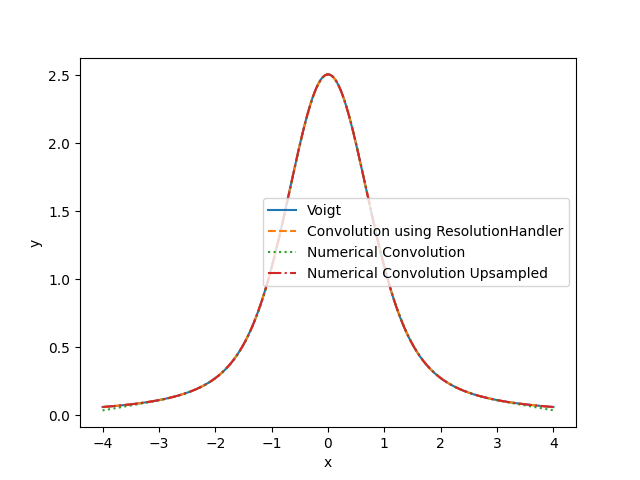

In [2]:
# Try out the resolution handler

offset=Parameter('offset', 0.0)

Gaussian= GaussianComponent(center=0,width=0.5,area=2)
Lorentzian=LorentzianComponent(center=0, width=0.5, area=3)

Sample= SampleModel('MySample')
Sample.add_component(Gaussian)

Resolution=SampleModel('MyRes')
Resolution.add_component(Lorentzian)

Voigt=VoigtComponent(center=0, Gwidth=0.5, Lwidth=0.5, area=6)


x=np.linspace(-4, 4, 1000)

MyResolutionHandler=ResolutionHandler()
Convolution=MyResolutionHandler.convolve(x, Sample, Resolution)

NumConvolution=MyResolutionHandler.numerical_convolve(x, Sample, Resolution,offset)
NumConvolutionUpSample=MyResolutionHandler.numerical_convolve(x, Sample, Resolution,offset,5)


plt.plot(x, Voigt.evaluate(x), label='Voigt')
plt.plot(x, Convolution, label='Convolution using ResolutionHandler',linestyle='--')
plt.plot(x, NumConvolution, label='Numerical Convolution', linestyle=':')
plt.plot(x, NumConvolutionUpSample, label='Numerical Convolution Upsampled', linestyle='-.')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')



In [ ]:
from easydynamics.utils import detailed_balance_factor

# Example of DetailedBalance

x=np.linspace(-2, 2, 1000)
Lorentzian=LorentzianComponent(center=0, width=0.1, area=1)

DetailedBalanceT1=detailed_balance_factor(x,temperature_K=0.0)
plt.plot(x,Lorentzian.evaluate(x)*DetailedBalanceT1, label='T=0')

DetailedBalanceT3=detailed_balance_factor(x,temperature_K=1)
plt.plot(x,Lorentzian.evaluate(x)*DetailedBalanceT3, label='T=1')

DetailedBalanceT3=detailed_balance_factor(x,temperature_K=3)
plt.plot(x,Lorentzian.evaluate(x)*DetailedBalanceT3, label='T=3')

plt.plot(x, Lorentzian.evaluate(x), label='No DBF', linestyle='--')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')


ImportError: cannot import name 'DetailedBalance' from 'easydynamics.sample.components' (C:\Users\henrikjacobsen3\Documents\easyScience\EasyQENSLib\src\easydynamics\sample\components.py)

In [ ]:
from easydynamics.utils import detailed_balance_factor

from scipy.signal import fftconvolve

Sample= SampleModel()
Sample.add_component(Gaussian)

Resolution=SampleModel()
Resolution.add_component(Lorentzian)




# Example of DetailedBalance

x=np.linspace(-2, 2, 1000)
Lorentzian=LorentzianComponent(center=0, width=0.1, area=1)
Gaussian= GaussianComponent(center=0,width=0.1,area=1)
Voigt=VoigtComponent(center=0, Gwidth=0.1, Lwidth=0.1, area=1)

DetailedBalanceT1=detailed_balance_factor(x,temperature_K=0.0)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT1, label='T=0')

DetailedBalanceT2=detailed_balance_factor(x,temperature_K=1)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT2, label='T=1')

DetailedBalanceT3=detailed_balance_factor(x,temperature_K=3)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT3, label='T=3')

# plt.plot(x, Voigt.evaluate(x), label='No DBF', linestyle='--')



# Evaluate both models at the same points
model1 = Lorentzian.evaluate(x)*DetailedBalanceT1
model2 = Gaussian.evaluate(x)

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='DBF first, then convolve', linestyle='-.')


model1 = Lorentzian.evaluate(x)*DetailedBalanceT2
model2 = Gaussian.evaluate(x)

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='DBF first, then convolve', linestyle='-.')

model1 = Lorentzian.evaluate(x)*DetailedBalanceT3
model2 = Gaussian.evaluate(x)       

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='DBF first, then convolve', linestyle='-.')





plt.legend()
plt.xlabel('x')
plt.ylabel('y')


In [ ]:
from easydynamics.sample.components import DetailedBalance

from scipy.signal import fftconvolve

Sample= SampleModel()
Sample.add_component(Gaussian)

Resolution=SampleModel()
Resolution.add_component(Lorentzian)




# Example of DetailedBalance, up to 100 mueV. Res and peak is 5 mueV

x=np.linspace(-0.1, 0.1, 1000)
Lorentzian=LorentzianComponent(center=0, width=0.005, area=1)
Gaussian= GaussianComponent(center=0,width=0.005,area=1)
Voigt=VoigtComponent(center=0, Gwidth=0.005, Lwidth=0.005, area=1)

DetailedBalanceT1=DetailedBalance(x,temperature_K=0.0)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT1, label='T=0')

DetailedBalanceT2=DetailedBalance(x,temperature_K=0.1)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT2, label='T=0.1 K')
    
DetailedBalanceT3=DetailedBalance(x,temperature_K=0.3)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT3, label='T=0.3 K')

# plt.plot(x, Voigt.evaluate(x), label='No DBF', linestyle='--')



# Evaluate both models at the same points
model1 = Lorentzian.evaluate(x)*DetailedBalanceT1
model2 = Gaussian.evaluate(x)

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='DBF first, then convolve', linestyle='-.')


model1 = Lorentzian.evaluate(x)*DetailedBalanceT2
model2 = Gaussian.evaluate(x)

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='DBF first, then convolve', linestyle='-.')

model1 = Lorentzian.evaluate(x)*DetailedBalanceT3
model2 = Gaussian.evaluate(x)       

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='DBF first, then convolve', linestyle='-.')





plt.legend()
plt.xlabel('x')
plt.ylabel('y')


In [ ]:
from easydynamics.sample.components import DetailedBalance

from scipy.signal import fftconvolve

Sample= SampleModel()
Sample.add_component(Gaussian)

Resolution=SampleModel()
Resolution.add_component(Lorentzian)




# Example of DetailedBalance, up to 2 meV. Res and peak is 100 mueV

x=np.linspace(-2, 2, 1000)
Lorentzian=LorentzianComponent(center=0, width=0.1, area=1)
Gaussian= GaussianComponent(center=0,width=0.1,area=1)
Voigt=VoigtComponent(center=0, Gwidth=0.1, Lwidth=0.1, area=1)

DetailedBalanceT1=DetailedBalance(x,temperature_K=0.0)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT1, label='T=0')

DetailedBalanceT2=DetailedBalance(x,temperature_K=1)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT2, label='T=1 K')
    
DetailedBalanceT3=DetailedBalance(x,temperature_K=3)
plt.plot(x,Voigt.evaluate(x)*DetailedBalanceT3, label='T=3 K')

# plt.plot(x, Voigt.evaluate(x), label='No DBF', linestyle='--')



# Evaluate both models at the same points
model1 = Lorentzian.evaluate(x)*DetailedBalanceT1
model2 = Gaussian.evaluate(x)

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='DBF first, then convolve', linestyle='-.')


model1 = Lorentzian.evaluate(x)*DetailedBalanceT2
model2 = Gaussian.evaluate(x)

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='DBF first, then convolve', linestyle='-.')

model1 = Lorentzian.evaluate(x)*DetailedBalanceT3
model2 = Gaussian.evaluate(x)       

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved, label='DBF first, then convolve', linestyle='-.')





plt.legend()
plt.xlabel('x')
plt.ylabel('y')


In [ ]:
from easydynamics.sample.components import DetailedBalance

from scipy.signal import fftconvolve


x=np.linspace(-3, 3, 1000)
Lorentzian=LorentzianComponent(center=0, width=0.1, area=1)
Gaussian= GaussianComponent(center=0,width=0.1,area=1)


Sample= SampleModel()
Sample.add_component(Lorentzian)

Resolution=SampleModel()
Resolution.add_component(Gaussian)




DetailedBalanceT3=DetailedBalance(x,temperature_K=3)

model1 = Lorentzian.evaluate(x)*DetailedBalanceT3
model2 = Gaussian.evaluate(x)       

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

# Add Gaussian noise (adjust noise level as needed)
noise_level = 0.02  # Small relative noise
noisy_convolved = convolved + np.random.normal(scale=noise_level, size=convolved.shape)+0.05

# Plot only every 10th point
# plt.plot(x[::10], noisy_convolved[::10], label='Example data, 3 K', linestyle='None', marker='o', markersize=6,markerfacecolor='w')





DetailedBalanceT3=DetailedBalance(x,temperature_K=5)

model1 = Lorentzian.evaluate(x)*DetailedBalanceT3
model2 = Gaussian.evaluate(x)       

# Perform convolution
convolved = fftconvolve(model1, model2, mode='same')
# Normalize the result to maintain the area under the curve
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

# Add Gaussian noise (adjust noise level as needed)
noise_level = 0.02  # Small relative noise
noisy_convolved = convolved + np.random.normal(scale=noise_level, size=convolved.shape)+0.05

# Plot only every 10th point
plt.plot(x[::10], noisy_convolved[::10], label='Example data, 5 K', linestyle='None', marker='o', markersize=6,markerfacecolor='w')



# One start guess

# Lorentzian2=LorentzianComponent(center=0, width=0.15, amplitude=1)
# Lorentzian2=LorentzianComponent(center=0, width=0.15, amplitude=1*2.7)
Lorentzian2=LorentzianComponent(center=0, width=0.15, area=1*2.7)
Gaussian= GaussianComponent(center=0,width=0.1,area=1)

model1 = Lorentzian2.evaluate(x)*DetailedBalanceT3
model2 = Gaussian.evaluate(x)  

convolved = fftconvolve(model1, model2, mode='same')
convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

plt.plot(x, convolved+0.05, label='Guess', linestyle='-.', color='r')


# # Using area instead

# # Lorentzian2=LorentzianComponent(center=0, width=0.15, area=0.5)
# # Lorentzian2=LorentzianComponent(center=0, width=0.15, area=0.5*2.5)
# Lorentzian2=LorentzianComponent(center=0, width=0.1, area=0.5*2.5)

# Gaussian= GaussianComponent(center=0,width=0.1,area=1)

# model1 = Lorentzian2.evaluate(x)*DetailedBalanceT3
# model2 = Gaussian.evaluate(x)  

# convolved = fftconvolve(model1, model2, mode='same')
# convolved*= (x[1] - x[0])  # Assuming uniform spacing in x

# plt.plot(x, convolved+0.05, label='Guess', linestyle='-.', color='r')



plt.legend()
plt.xlabel('Energy (meV)')
plt.ylabel('Intensity (a.u.)')


In [ ]:
Lorentzian.amplitude